# Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd

# Load the training and testing datasets
train_df = pd.read_csv('customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('customer_churn_dataset-testing-master.csv')
# Concatenate the datasets
churn = pd.concat([train_df, test_df], ignore_index=True)

In [22]:
churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# Data Preprocessing

In [23]:
churn.columns = [col.replace(' ','_') for col in churn.columns]

In [24]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage_Frequency    505206 non-null  float64
 5   Support_Calls      505206 non-null  float64
 6   Payment_Delay      505206 non-null  float64
 7   Subscription_Type  505206 non-null  object 
 8   Contract_Length    505206 non-null  object 
 9   Total_Spend        505206 non-null  float64
 10  Last_Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [25]:
churn.describe()

,CustomerID,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [26]:
churn.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage_Frequency      1
Support_Calls        1
Payment_Delay        1
Subscription_Type    1
Contract_Length      1
Total_Spend          1
Last_Interaction     1
Churn                1
dtype: int64

Handling for Nulls


In [27]:
churn.dropna(inplace=True)

Handling for Duplicates¶


In [28]:
churn.duplicated().sum()

0

In [29]:
churn.drop(columns=['CustomerID'], inplace=True)
#We remove the CustomerID column because it is not useful for the prediction.

<Axes: >

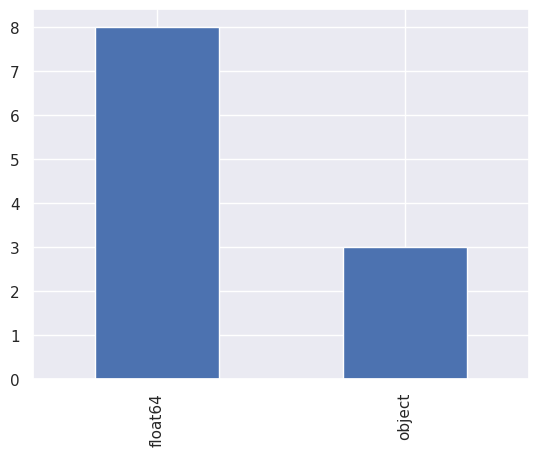

In [30]:
churn.dtypes.value_counts().plot.bar()

Handling for Outliers


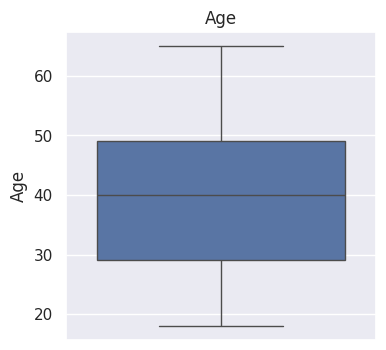

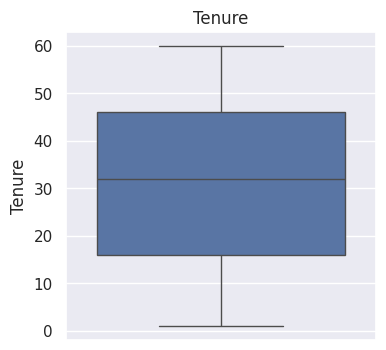

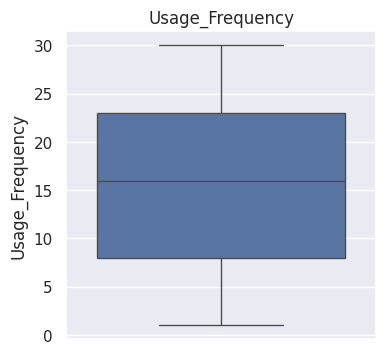

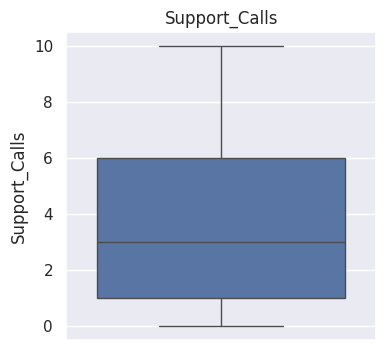

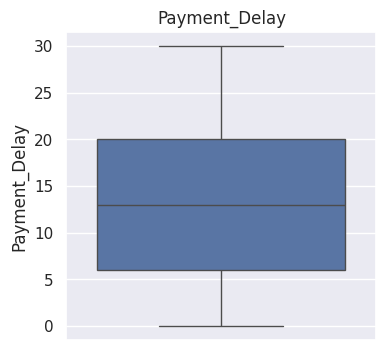

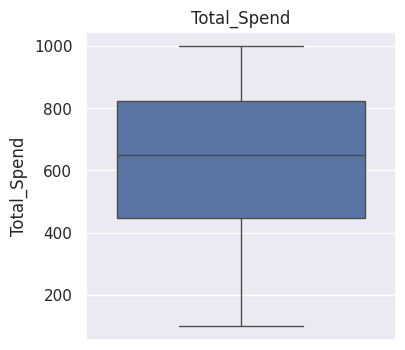

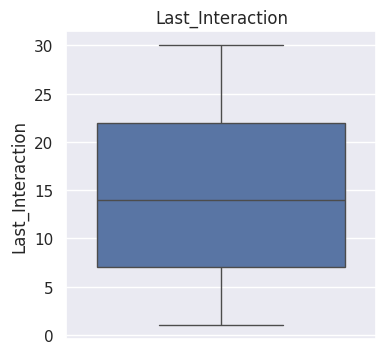

In [32]:
numerical_features = churn.select_dtypes('float').drop('Churn', axis=1)

for feature in numerical_features:
    plt.figure(figsize=(4,4))
    sns.boxplot(churn[feature])
    plt.title(feature)
    plt.show()

There are no outliers in numerical features.



# Categorical Encoding¶


In [33]:
categorical_features = churn.select_dtypes('object').columns.tolist()
categorical_features

['Gender', 'Subscription_Type', 'Contract_Length']

<Axes: xlabel='Gender'>

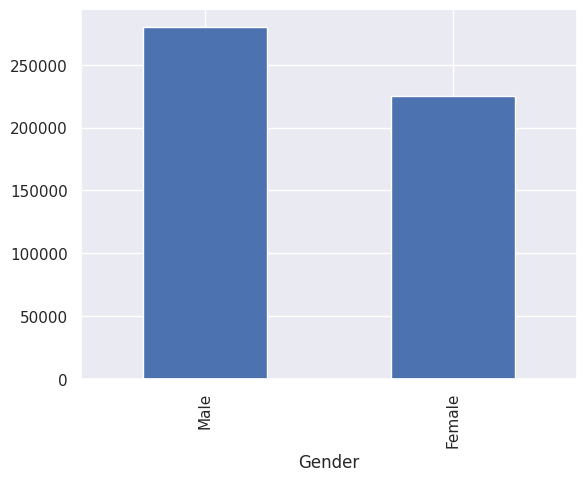

In [34]:
churn['Gender'].value_counts().plot.bar()

<Axes: xlabel='Subscription_Type'>

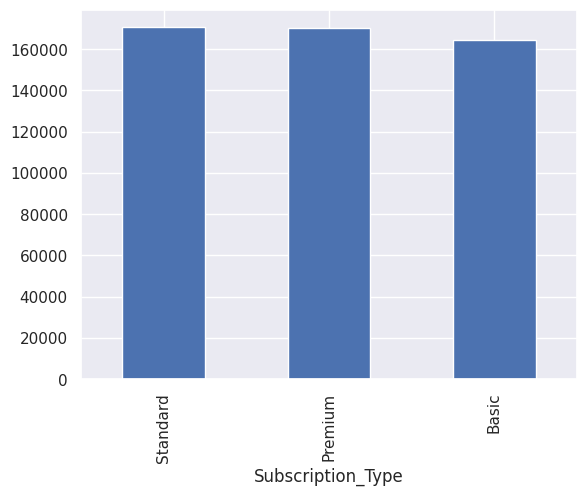

In [35]:
churn['Subscription_Type'].value_counts().plot.bar()

<Axes: xlabel='Contract_Length'>

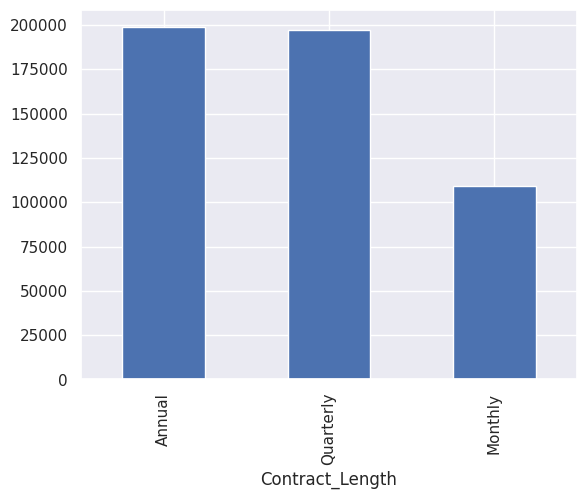

In [36]:
churn['Contract_Length'].value_counts().plot.bar()

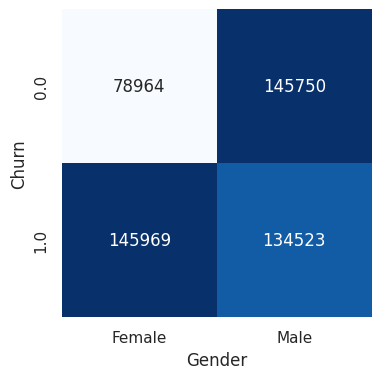

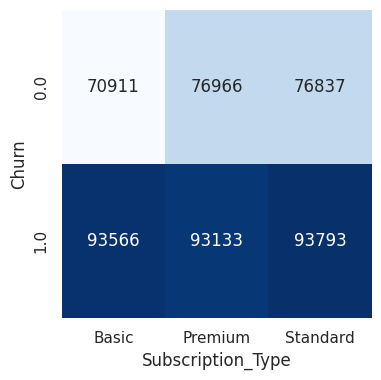

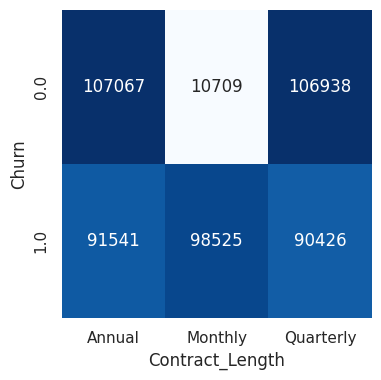

In [37]:
for feature in categorical_features:
    plt.figure(figsize=(4,4))
    sns.heatmap(pd.crosstab(churn['Churn'], churn[feature]), cmap='Blues', cbar=None, annot=True, fmt='d')

In [38]:
df1 = pd.get_dummies(churn, columns=categorical_features, drop_first=True, dtype='int')

In [39]:
df1 = df1[['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction','Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly', 'Churn']]

In [40]:
df1.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,0,0,1,0,0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,0,0,0,1,0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,0,0,0,0,1,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1,0,1,1,0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1,0,0,1,0,1.0


# Modelling

In [42]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [43]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (353644, 12), y_train: (353644,)


In [44]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (151562, 12), y_test: (151562,)


In [45]:
X_train.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly
193093,57.0,51.0,14.0,7.0,1.0,119.00,19.0,0,0,0,0,1
6414,43.0,16.0,23.0,1.0,1.0,290.00,29.0,0,0,1,0,0
324150,37.0,34.0,1.0,1.0,12.0,555.12,1.0,1,0,0,0,0
118147,37.0,39.0,24.0,4.0,23.0,469.00,11.0,1,0,1,0,1
213396,64.0,49.0,15.0,5.0,29.0,381.97,9.0,0,0,1,0,0


In [46]:
y_train

193093    1.0
6414      1.0
324150    0.0
118147    1.0
213396    1.0
         ... 
259179    0.0
365839    0.0
131932    1.0
146867    1.0
121958    1.0
Name: Churn, Length: 353644, dtype: float64

In [47]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [48]:
def results(y_pred):
    """
    Input:
        - y_pred: 1D-array containing predictions
    Output:
        - results: dictionnary containing the metrics from predictions

    Returns metrics (accuracy, precision, recall, f1 and roc auc scores) from predictions
    """
    results = {}

    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1_score'] = f1_score(y_test, y_pred)
    results['roc_auc_score'] = roc_auc_score(y_test, y_pred)

    return results

In [49]:
results(y_pred)

{'accuracy': 0.8192224964041118,
 'precision': 0.8425903643451894,
 'recall': 0.8302526587861471,
 'f1_score': 0.8363760144758766,
 'roc_auc_score': 0.8178175327730703}